<a href="https://colab.research.google.com/github/SivarasaKajananan/Text-summarization-from-PDF-with-Geminai/blob/main/Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (411 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [1]:
pip install pdf2image

In [2]:
import pdf2image
import matplotlib.pyplot as plt
from pathlib import Path
from functools import partial
import google.generativeai as genai

In [3]:
from google.colab import files
fle=files.upload()

Saving handwritten.pdf to handwritten (2).pdf


In [4]:
pdf_path="handwritten.pdf"
pages = pdf2image.convert_from_path(pdf_path)

In [5]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('Gemini')
genai.configure(api_key=GOOGLE_API_KEY)

In [6]:
# Set up the model
generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)



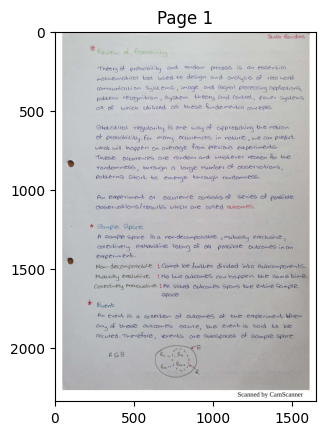

ReadTimeout: HTTPConnectionPool(host='localhost', port=41069): Read timed out. (read timeout=60.0)

In [8]:
with open("extracted_text.txt", "w") as file:
    for i, page in enumerate(pages):
        page.save("page_" + str(i) + ".jpg", "JPEG")
        img = plt.imread("page_" + str(i) + ".jpg")
        plt.imshow(img)
        plt.title(f"Page {i+1}")
        plt.show()

        if not (img := Path("page_" + str(i) + ".jpg")).exists():
            raise FileNotFoundError(f"Could not find image: {img}")

        image_parts = [
            {
                "mime_type": "image/jpeg",
                "data": Path("page_" + str(i) + ".jpg").read_bytes()
            },
        ]

        prompt_parts = [
            image_parts[0],
            "extract the text",
        ]

        response = model.generate_content(prompt_parts)
        extracted_text = response.text
        file.write(extracted_text + "\n")

In [14]:
model1 = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)
with open("extracted_text.txt2", "r") as file:
    # Choose one of the following methods to read the text:

    # 1. Read the entire content into a string:
    entire_text = file.read()
    # print(entire_text)
    prompt_parts = [
            entire_text,
            "Give the summarization ",
        ]
    response1 = model1.generate_content(prompt_parts)
    print(response1.text)

- Probability theory is a mathematical tool used in various fields such as communication systems, image processing, and control systems.
- Statistical regularity helps predict average outcomes from previous experiences, despite the randomness of occurrences.
- A sample space is a listing of all possible outcomes in an experiment, while an event is a collection of outcomes.
- Events can be categorized as sure events, impossible events, union events, intersection events, and mutually exclusive events.
- An event space is formed when a set of events are mutually exclusive and collectively exhaustive.
